# Data Analytics Assignment 2024

## 1. Problem statement:

Can vaccination rates predict a reduction in COVID-related deaths?

### Solution to Problem:

To get more people vaccinated and develop an action plan incase another pandemic occurs    by presenting the evedince.

In [312]:
#Dylan Diergaardt
#Data handeling/modeling
import pandas as pd
import numpy as np
import pylab
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics
import scipy.stats as stats
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from scipy.stats import f
import pingouin as pg
import statsmodels.api as sm


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

# visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 2. Load Data set
 
 This dataset provides information on the global COVID-19 vaccination efforts and their potential impact on COVID-19 mortality rates. It includes data for various countries, capturing the number of vaccinations, the number of people vaccinated, and the number of new deaths reported.

In [313]:
covid19_data = pd.read_csv(r"C:\Users\DiergaardtDA\OneDrive - Anglo American\Documents\GitHub\DTA_Assignment2024\covid-vaccination-vs-death_ratio.csv")

In [279]:
covid19_data

,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,12,40374668.0,1.1117812783
1,1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,10,40374668.0,1.1649408486
2,2,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,10,40374668.0,1.1798660487
3,3,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0,19,40374668.0,1.1873088343
4,4,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,14,40374668.0,1.1878091481
...,...,...,...,...,...,...,...,...,...,...
32906,32906,Zimbabwe,ZWE,2022-03-25,8691642.0,4814582.0,3473523.0,2,15229891.0,31.6127147594
32907,32907,Zimbabwe,ZWE,2022-03-26,8791728.0,4886242.0,3487962.0,2,15229891.0,32.0832368400
32908,32908,Zimbabwe,ZWE,2022-03-27,8845039.0,4918147.0,3493763.0,1,15229891.0,32.2927261922
32909,32909,Zimbabwe,ZWE,2022-03-28,8934360.0,4975433.0,3501493.0,1,15229891.0,32.6688680832


# 3. Data Cleaning Process

### 3.1 Remove unamed columns

Remove any unnecesary columns

In [314]:
# Remove the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in covid19_data.columns:
    covid19_data = covid19_data.drop(columns=['Unnamed: 0'])

In [281]:
covid19_data

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,12,40374668.0,1.1117812783
1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,10,40374668.0,1.1649408486
2,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,10,40374668.0,1.1798660487
3,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0,19,40374668.0,1.1873088343
4,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,14,40374668.0,1.1878091481
...,...,...,...,...,...,...,...,...,...
32906,Zimbabwe,ZWE,2022-03-25,8691642.0,4814582.0,3473523.0,2,15229891.0,31.6127147594
32907,Zimbabwe,ZWE,2022-03-26,8791728.0,4886242.0,3487962.0,2,15229891.0,32.0832368400
32908,Zimbabwe,ZWE,2022-03-27,8845039.0,4918147.0,3493763.0,1,15229891.0,32.2927261922
32909,Zimbabwe,ZWE,2022-03-28,8934360.0,4975433.0,3501493.0,1,15229891.0,32.6688680832


### 3.2 Check for any missing/null data
Check for any empty values within the data set

In [315]:
# Check for missing data
missing_data = covid19_data.isnull().sum()
print(missing_data)

country                    0
iso_code                   0
date                       0
total_vaccinations         0
people_vaccinated          0
people_fully_vaccinated    0
New_deaths                 0
population                 0
ratio                      0
dtype: int64


## 3.3 Handle Vaccination Data Logical Errors

Ensure that people_fully_vaccinated is not greater than people_vaccinated, and people_vaccinated is not greater than total_vaccinations

In [316]:
# Filter out rows for 'people_fully_vaccinated' , 'people_vaccinated' and
# 'total_vaccinations'
filtered_columns = covid19_data[['people_fully_vaccinated', 'people_vaccinated', 'total_vaccinations']]

# Check if there are any rows  where 'people_fully_vaccinated' > 'people_vaccinated'
fully_vaccinated_errors = filtered_columns[filtered_columns['people_fully_vaccinated'] > filtered_columns['people_vaccinated']]

# Check if there are any rows left  'people_vaccinated' > 'total_vaccinations'
vaccinated_errors = filtered_columns[filtered_columns['people_vaccinated'] > filtered_columns['total_vaccinations']]

# If these are empty, the filter was successful and there is no logical errors in the data
print(f"Rows with 'people_fully_vaccinated' > 'people_vaccinated' after filtering: {len(fully_vaccinated_errors)}")
print(f"Rows with 'people_vaccinated' > 'total_vaccinations' after filtering: {len(vaccinated_errors)}")

# Display the problematic rows if there are any for review
print(fully_vaccinated_errors)
print(vaccinated_errors)



Rows with 'people_fully_vaccinated' > 'people_vaccinated' after filtering: 0
Rows with 'people_vaccinated' > 'total_vaccinations' after filtering: 0
Empty DataFrame
Columns: [people_fully_vaccinated, people_vaccinated, total_vaccinations]
Index: []
Empty DataFrame
Columns: [people_fully_vaccinated, people_vaccinated, total_vaccinations]
Index: []


## 3.4 Check for duplicate row values 
Ensure that no country is recorded twice on the same day

In [317]:
# Check for duplicate rows based on country and date combination
duplicate_rows = covid19_data[covid19_data.duplicated(subset=['country', 'date'], keep=False)]
print(duplicate_rows)

Empty DataFrame
Columns: [country, iso_code, date, total_vaccinations, people_vaccinated, people_fully_vaccinated, New_deaths, population, ratio]
Index: []


## 3.5 Data Transformation : creating new variables, converting variable types, or rescaling variables.

In [318]:
# Convert the 'date' column to datetime
# For pandas to correctly interperate the date column if need be for any time based operations
covid19_data['date'] = pd.to_datetime(covid19_data['date'], errors='coerce')  # 'errors=coerce' handles invalid formats
print(covid19_data['date'].dtype)

datetime64[ns]


In [319]:
 ##Ensure numerical columns are properly formatted
numerical_columns = ['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'New_deaths', 'population']
# Handle NaN values (e.g., fill NaN with 0 or any other value before conversion)
covid19_data[numerical_columns] = covid19_data[numerical_columns].fillna(0)

# Convert to integer values
covid19_data[numerical_columns] = covid19_data[numerical_columns].astype('int64')



In [320]:
# Convert categorical columns (e.g., country, iso_code) to 'category' type
covid19_data['country'] = covid19_data['country'].astype('category')
covid19_data['iso_code'] = covid19_data['iso_code'].astype('category')

In [321]:
# Print to check all of your data types are correct
print("Current data types:\n", covid19_data.dtypes)


Current data types:
 country                          category
iso_code                         category
date                       datetime64[ns]
total_vaccinations                  int64
people_vaccinated                   int64
people_fully_vaccinated             int64
New_deaths                          int64
population                          int64
ratio                             float64
dtype: object


In [322]:
# Recalculate the 'ratio' in a different column and correct any discrepancies
covid19_data['calculated_ratio'] = (covid19_data['people_vaccinated'] / covid19_data['population']) * 100


In [323]:
# Calculate the difference
difference = covid19_data['calculated_ratio'] - covid19_data['ratio']

#Check for differences that are greater than a small tolerance (e.g., 1e-6)
tolerance = 1e-6
discrepancies = covid19_data[difference > tolerance]

# Print or inspect the discrepancies
if discrepancies.empty:
    print("All values in 'calculated_ratio' match the 'ratio' column.")
else:
    print("There are discrepancies in the following rows:")
    print(discrepancies[['calculated_ratio', 'ratio']])

All values in 'calculated_ratio' match the 'ratio' column.


In [324]:
pd.set_option('display.precision', 10) 

In [329]:
#Confirm ratio values are consitent with calculated ratio
row_values = covid19_data.loc[25, ['calculated_ratio', 'ratio']]
print(row_values)
display_columns2 = ['ratio','calculated_ratio']

covid19_data[display_columns2].head(30)

calculated_ratio    11.1737686611
ratio               11.1737686611
Name: 25, dtype: object


,ratio,calculated_ratio
0,1.1117812783,1.1117812783
1,1.1649408486,1.1649408486
2,1.1798660487,1.1798660487
3,1.1873088343,1.1873088343
4,1.1878091481,1.1878091481
5,1.1894240220,1.1894240220
6,1.1930500580,1.1930500580
7,1.1933225061,1.1933225061
8,1.1961757803,1.1961757803
9,1.2005968693,1.2005968693


In [330]:
#Replace the 'ratio' and drop the calculated ratio c
covid19_data['ratio'] = covid19_data['calculated_ratio']
covid19_data = covid19_data.drop(columns=['calculated_ratio'])

In [331]:
covid19_data.head(30)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,Afghanistan,AFG,2021-05-11,504502,448878,55624,12,40374668,1.1117812783
1,Afghanistan,AFG,2021-05-20,547901,470341,77560,10,40374668,1.1649408486
2,Afghanistan,AFG,2021-05-24,573277,476367,96910,10,40374668,1.1798660487
3,Afghanistan,AFG,2021-05-26,590454,479372,111082,19,40374668,1.1873088343
4,Afghanistan,AFG,2021-05-27,593313,479574,113739,14,40374668,1.1878091481
5,Afghanistan,AFG,2021-05-30,600152,480226,119926,20,40374668,1.1894240220
6,Afghanistan,AFG,2021-06-02,626290,481690,144600,34,40374668,1.1930500580
7,Afghanistan,AFG,2021-06-03,630305,481800,148505,27,40374668,1.1933225061
8,Afghanistan,AFG,2021-06-08,641295,482952,158343,64,40374668,1.1961757803
9,Afghanistan,AFG,2021-06-14,662003,484737,177266,85,40374668,1.2005968693


## 3.6 Identifying Outliers that could skew data analysis

In [300]:


# Function to detect outliers using IQR and return them
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

      # Print the lower and upper bounds
    print(f"For column: {column}")
    print(f"Q1 (25th percentile): {Q1}")
    print(f"Q3 (75th percentile): {Q3}")
    print(f"IQR: {IQR}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}\n")
    
    # Identify the outliers
    outliers = covid19_data[(covid19_data[column] < lower_bound) | (covid19_data[column] > upper_bound)]
    return outliers

# List of columns to check for outliers
columns_to_check = ['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'New_deaths', 'ratio']

# Loop through the columns to detect and display bounds and outliers
for col in columns_to_check:
    # Detect outliers and print lower/upper bounds
    outliers = detect_outliers_iqr(covid19_data, col)
    
    # Print the number of outliers detected
    print(f"Number of outliers detected in column {col}: {len(outliers)}")
    if len(outliers) > 0:
        print("Outliers:")
        print(outliers)
    else:
        print(f"No outliers found in {col}.\n")
  


For column: total_vaccinations
Q1 (25th percentile): 737487.5
Q3 (75th percentile): 19165647.5
IQR: 18428160.0
Lower Bound: -26904752.5
Upper Bound: 46807887.5

Number of outliers detected in column total_vaccinations: 4962
Outliers:
         country iso_code       date  total_vaccinations  people_vaccinated  \
691    Argentina      ARG 2021-09-08          47149100.0         29031621.0   
692    Argentina      ARG 2021-09-09          47546339.0         29081356.0   
693    Argentina      ARG 2021-09-10          47888281.0         29130968.0   
694    Argentina      ARG 2021-09-11          48087127.0         29156546.0   
695    Argentina      ARG 2021-09-12          48097219.0         29158965.0   
...          ...      ...        ...                 ...                ...   
32435   Viet Nam      VNM 2022-03-18         157364248.0         79690136.0   
32436   Viet Nam      VNM 2022-03-19         157371573.0         79693650.0   
32437   Viet Nam      VNM 2022-03-20         157383290.

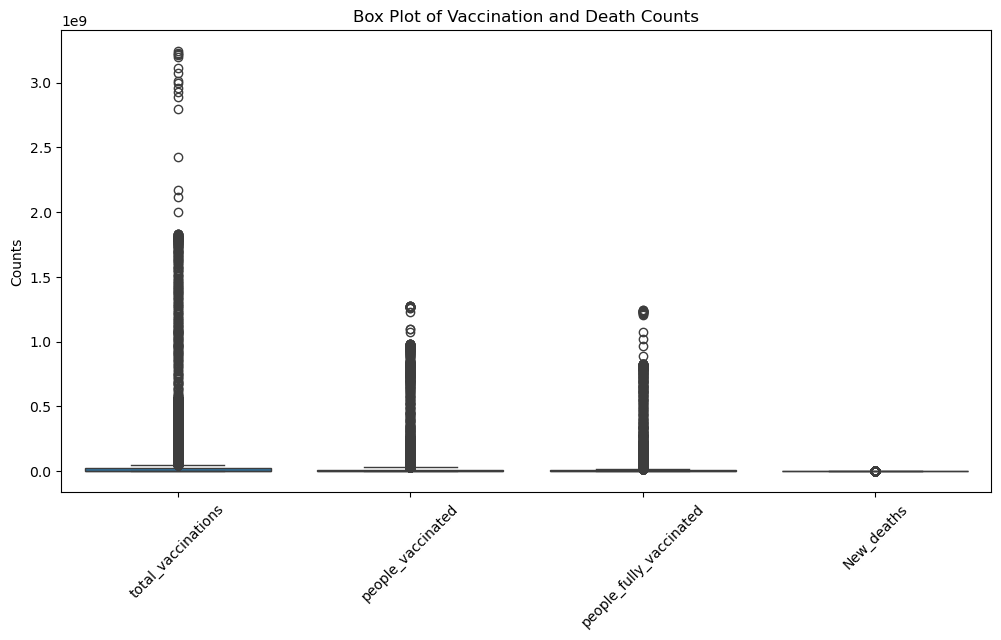

In [332]:
# List of columns of interest
columns_of_interest = ['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'New_deaths']

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=covid19_data[columns_of_interest])
plt.title('Box Plot of Vaccination and Death Counts')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()
# please give feedback